# Variance Problem of single Trees


## Import needed modules

In [ ]:
from sklearn.datasets import *
from IPython.display import Image, display_svg, SVG
from matplotlib import pyplot as plt
from tqdm import tqdm
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

## Install and import missing dependencies

In [ ]:
!pip install -q dtreeviz
from dtreeviz.trees import *

## Filter warnings
The dtreeviz packages reports some missing fonts, we disable the warnings for now.

In [ ]:
import warnings
warnings.filterwarnings('ignore')

## Load the Diabetes dataset
Notice: Compared to the previous exercises (dimension reduction), we do not need to prepare the data further. Therefore, we do not need to apply any scaling.

In [ ]:
ds = load_diabetes()

X = ds.data
y = ds.target

feature_names = ds.feature_names
#class_names = ds.target_names

print(f"Len of the dataset: {len(X)}")
print(f"Features: {feature_names}")
#print(f"Classes: {class_names}")

Len of the dataset: 442
Features: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


## Split the dataset into train and test sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10,shuffle=True, random_state=42)

## Train the Regression Trees and track the performance

In [ ]:
# define the various depths
max_depth = 15
depths = range(1, max_depth)

# train and store the regressors
regressors = []

for d in tqdm(depths):
  # init and train the classifier
  r = tree.DecisionTreeRegressor(max_depth=d) 
  r.fit(X_train, y_train)

  mse_test = mean_squared_error(y_test, r.predict(X_test))
  mse_train = mean_squared_error(y_train, r.predict(X_train))

  # append the depth, classifier visualization to the list
  regressors.append(
      {
          'depth': d,
          'regressor': r,
          'mse_test': mse_test,
          'mse_train': mse_train
      }
  )

100%|██████████| 14/14 [00:00<00:00, 208.72it/s]


In [ ]:
depths = [r['depth'] for r in regressors]
test_erros = [r['mse_test'] for r in regressors]
train_erros = [r['mse_train'] for r in regressors]

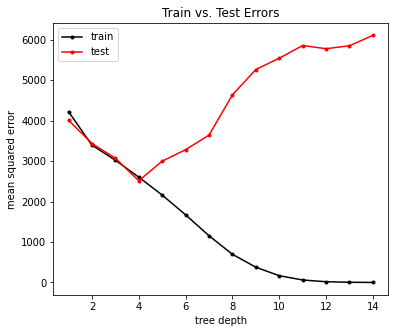

In [ ]:
plt.figure(figsize=(6,5))
plt.plot(depths,train_erros,'k.-',label="train")
plt.plot(depths,test_erros,'r.-',label="test")
plt.legend()
plt.xlabel("tree depth")
plt.ylabel("mean squared error")
plt.title("Train vs. Test Errors");